# Exercici 1

## Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

## També adjunt trobaràs una descripció de les diferents variables del dataset.

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")

> En un vistazo previo al fichero de datos, podemos ver que los datos no tienen encabezados, por lo que cargamos los datos y asignamos las columnas en el orden que vienen relacionadas en la descripción del dataset.

In [2]:
# Cargamos los datos del archivo en un Dataframe y asignamos nombre a las columnas.
df_housing = pd.read_csv('housing data.csv', header=None)
df_housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
df_housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [4]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
# Vemos los valores únicos de cada uno de los atributos
df_housing.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [6]:
df_housing.shape

(506, 14)

In [7]:
# Comprobamos si hay campos con valor núlo
df_housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
#Comprobamos si hay campos con valor NaN
df_housing.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df_housing.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


> De los datos obtenidos con la función _nunique()_ y con _describe()_ podemos ver que tenemos un atributo binario (CHAS) y otro atributo que sólo tiene 9 valores (**RAD**), por lo que se pueden considerar atributos categóricos y cambiarles el tipo para que no aparezcan en los cálculos estadísticos.

In [11]:
df_housing[['CHAS']].value_counts()

CHAS
0       471
1        35
dtype: int64

In [12]:
df_housing[['RAD']].value_counts()

RAD
24     132
5      115
4      110
3       38
6       26
2       24
8       24
1       20
7       17
dtype: int64

In [13]:
df_housing[['CHAS', 'RAD']] = df_housing[['CHAS', 'RAD']].astype('category')
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


> Información de los campos y descripción de los valores más carácterísticos:

  * **CRIM**: tasa de criminalidad per cápita por ciudad.
  * **ZN**: proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.
  * **INDUS**: proporción de acres de negocios no minoristas por ciudad.
  * **CHAS**: variable ficticia de Charles River (= 1 si la zona limita con el río; 0 en caso contrario).
  * **NOX**: concentración de óxidos nítricos (partes por 10 millones).
  * **RM**: número promedio de habitaciones por vivienda.
  * **AGE**: proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
  * **DIS**: distancias ponderadas a cinco centros de empleo en Boston.
  * **RAD**: índice de accesibilidad a autopistas radiales.
  * **TAX**: tasa de impuesto a la propiedad de valor total por cada 10,000 dólares.
  * **PTRATIO**: relación alumno-maestro por ciudad.
  * **B**: 1000(Bk - 0.63)^2 donde Bk es la proporción de población afroamericana por ciudad.
  * **LSTAT**: % de estatus socioeconómico bajo de la población.
  * **MEDV**: valor mediano de viviendas ocupadas por sus propietarios en miles de dólares.
  
> Todos los atributos corresponden a variables independientes y podemos afirmar que nuestra variable objetivo es la variable **MEDV**.
  

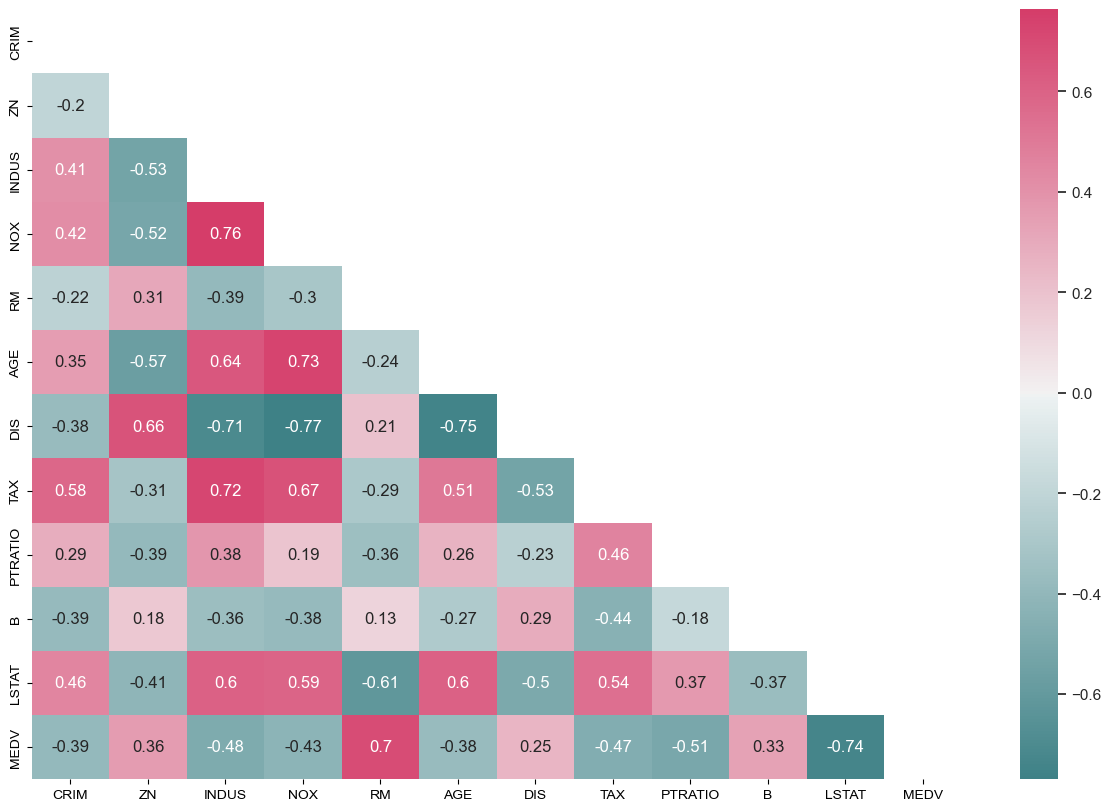

In [14]:
# Comprobamos mediante un heatmap las correlaciones entre los atributos
fig, ax = plt.subplots(figsize=(15, 10))
corr = df_housing.corr()
sns.set_theme(style="darkgrid")
cmap = sns.diverging_palette(200, 0, as_cmap=True)
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap=cmap)
plt.show()

> Tenemos una correlación positiva fuerte entre las variables **NOX**(concentración de óxidos nítricos (partes por 10 millones)) e **INDUS**(proporción de acres de negocios no minoristas por ciudad) que nos indica que las zonas donde existen negocios no minoristas aparentemente están más contaminadas.
> Tambien tenemos una correlación positiva entre las variables **AGE**(proporción de unidades ocupadas por sus propietarios construidas antes de 1940) y **NOX** que también parece indicar una relación entre la antigüedad de las viviendas y la contaminación de la zona.


> Sacamos las gráficas de distribución y Box Plot para comprobar la densidad, la situcación de medias y outliers de cada atributo.

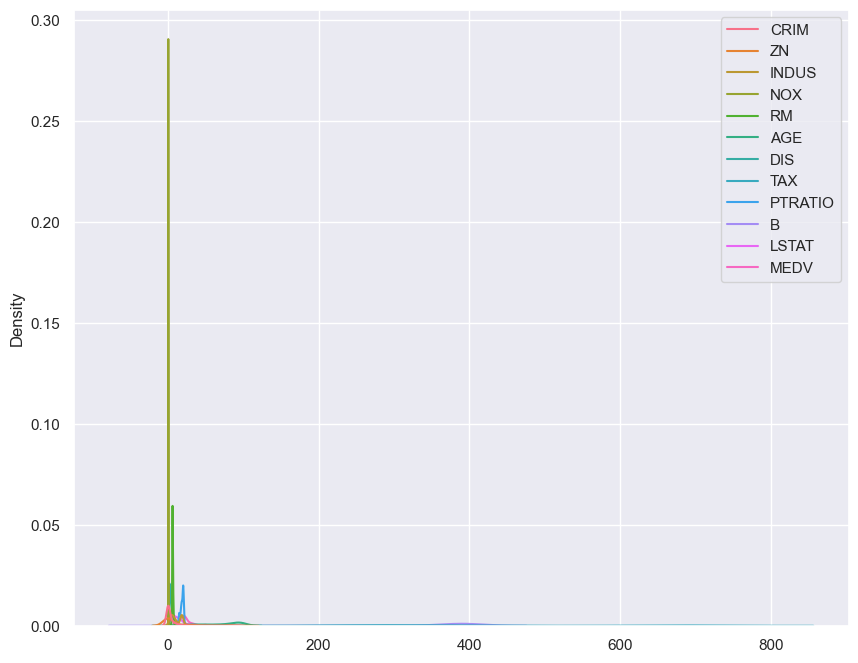

In [15]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.kdeplot(data=df_housing)

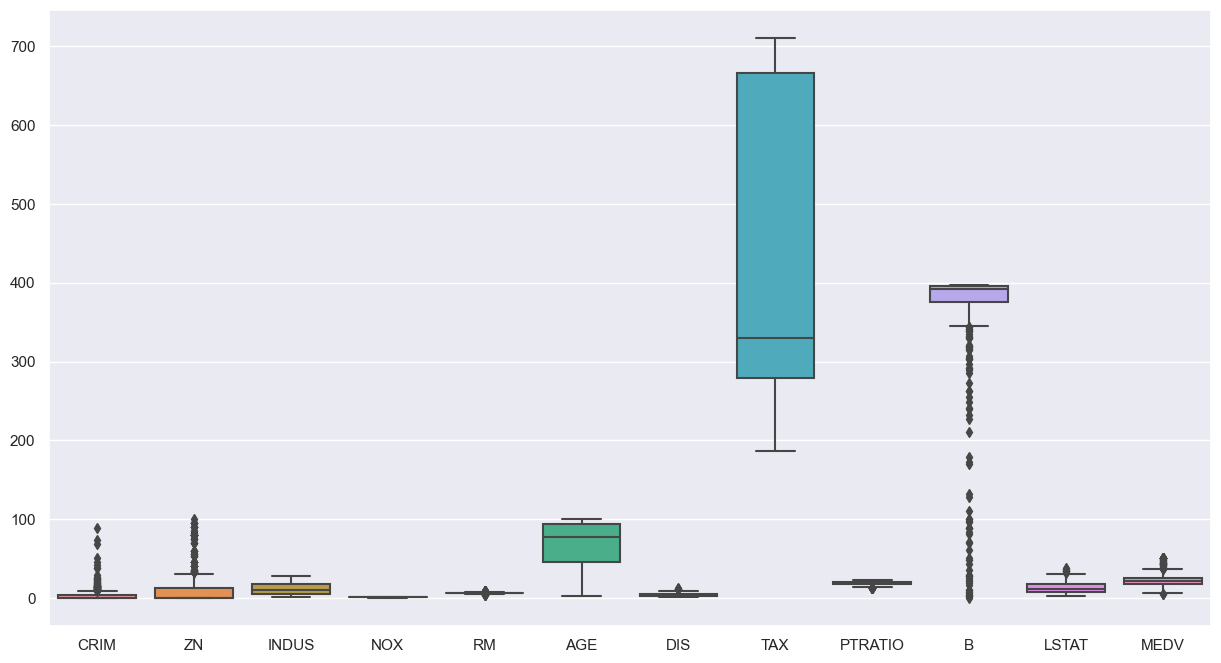

In [16]:
sns.set()
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.boxplot(data=df_housing)

> Partimos el conjunto de datos en train y test, de manera que un 80% sea para el entrenamiento y un 20% para el test.

In [17]:
X = df_housing.drop(['MEDV'],axis=1)
y = df_housing['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(len(X_train))
print(len(y_test))

404
102


>  Analizamos los principales datos estadísticos de ambos conjuntos y los comparamos con los del dataset completo.

In [18]:
X_train.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.54,8.31,0.01,0.08,0.28,3.36,88.98
ZN,404.0,11.32,23.31,0.00,0.00,0.00,12.50,100.00
INDUS,404.0,11.20,6.81,0.46,5.19,9.69,18.10,27.74
NOX,404.0,0.56,0.12,0.38,0.45,0.54,0.62,0.87
RM,404.0,6.26,0.69,3.86,5.88,6.17,6.62,8.78
AGE,404.0,68.84,28.23,2.90,44.68,79.05,94.30,100.00
DIS,404.0,3.80,2.11,1.14,2.10,3.13,5.22,12.13
TAX,404.0,406.76,166.62,187.00,281.00,332.00,666.00,711.00
PTRATIO,404.0,18.40,2.21,12.60,17.00,18.90,20.20,22.00
B,404.0,353.74,93.97,0.32,374.53,390.88,395.64,396.90


In [19]:
X_test.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,102.0,3.89,9.71,0.01,0.08,0.22,4.13,73.53
ZN,102.0,11.53,23.49,0.00,0.00,0.00,17.88,95.00
INDUS,102.0,10.90,7.09,1.25,4.60,9.12,18.10,27.74
NOX,102.0,0.55,0.11,0.40,0.44,0.52,0.63,0.87
RM,102.0,6.36,0.76,3.56,5.90,6.32,6.64,8.34
AGE,102.0,67.54,27.93,7.80,45.25,72.20,93.12,100.00
DIS,102.0,3.79,2.12,1.13,2.08,3.37,5.12,10.59
TAX,102.0,414.09,176.66,188.00,276.25,330.00,666.00,711.00
PTRATIO,102.0,18.66,1.97,12.60,17.40,19.10,20.20,22.00
B,102.0,368.29,79.16,2.60,377.07,393.26,396.90,396.90


Text(0.5, 1.0, 'X_test')

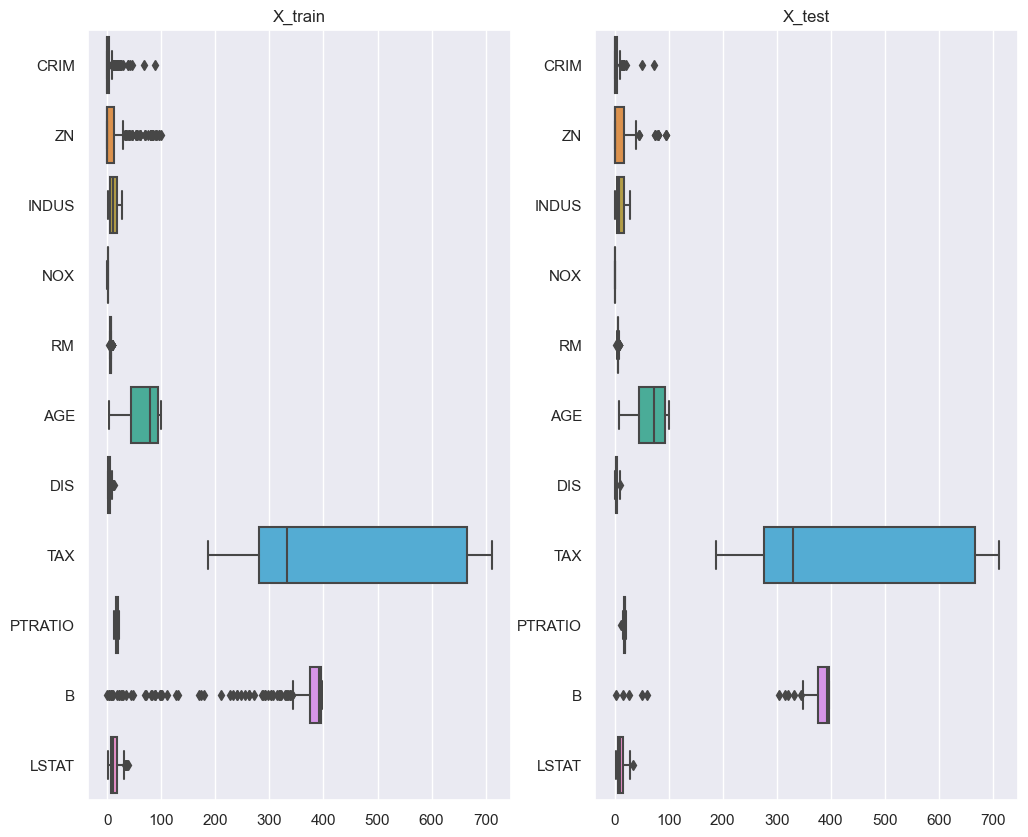

In [20]:
fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(1,2,1)
sns.boxplot(X_train, ax=ax1, orient = "h")
plt.title('X_train')

ax2 = fig.add_subplot(1,2,2)
sns.boxplot(X_test,ax=ax2, orient = "h")
plt.title('X_test')

> Tenemos outliers en alguna de las variables, pero destacan los existentes en la variable **B**

> Comprobamos mediante shapiro si las variables en _X_train_ y _X_test_ tienen una distribución gaussiana

In [21]:
for i in X_train:
    
    stat, p = shapiro(X_train[i])
    print('stat=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
         print(f'La variable {i} siguen una distribución normal. No se rechaza H0.\n')
    else: 
         print(f'La variable {i} NO siguen una distribución normal. Se rechaza H0.\n')

stat=0.458, p=0.000
La variable CRIM NO siguen una distribución normal. Se rechaza H0.

stat=0.555, p=0.000
La variable ZN NO siguen una distribución normal. Se rechaza H0.

stat=0.903, p=0.000
La variable INDUS NO siguen una distribución normal. Se rechaza H0.

stat=0.281, p=0.000
La variable CHAS NO siguen una distribución normal. Se rechaza H0.

stat=0.936, p=0.000
La variable NOX NO siguen una distribución normal. Se rechaza H0.

stat=0.961, p=0.000
La variable RM NO siguen una distribución normal. Se rechaza H0.

stat=0.887, p=0.000
La variable AGE NO siguen una distribución normal. Se rechaza H0.

stat=0.902, p=0.000
La variable DIS NO siguen una distribución normal. Se rechaza H0.

stat=0.673, p=0.000
La variable RAD NO siguen una distribución normal. Se rechaza H0.

stat=0.820, p=0.000
La variable TAX NO siguen una distribución normal. Se rechaza H0.

stat=0.902, p=0.000
La variable PTRATIO NO siguen una distribución normal. Se rechaza H0.

stat=0.498, p=0.000
La variable B NO 

In [22]:
for i in X_test:
    
    stat, p = shapiro(X_test[i])
    print('stat=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
         print(f'La variable {i} siguen una distribución normal. No se rechaza H0.\n')
    else: 
         print(f'La variable {i} NO siguen una distribución normal. Se rechaza H0.\n')

stat=0.427, p=0.000
La variable CRIM NO siguen una distribución normal. Se rechaza H0.

stat=0.557, p=0.000
La variable ZN NO siguen una distribución normal. Se rechaza H0.

stat=0.883, p=0.000
La variable INDUS NO siguen una distribución normal. Se rechaza H0.

stat=0.249, p=0.000
La variable CHAS NO siguen una distribución normal. Se rechaza H0.

stat=0.919, p=0.000
La variable NOX NO siguen una distribución normal. Se rechaza H0.

stat=0.951, p=0.001
La variable RM NO siguen una distribución normal. Se rechaza H0.

stat=0.905, p=0.000
La variable AGE NO siguen una distribución normal. Se rechaza H0.

stat=0.902, p=0.000
La variable DIS NO siguen una distribución normal. Se rechaza H0.

stat=0.700, p=0.000
La variable RAD NO siguen una distribución normal. Se rechaza H0.

stat=0.795, p=0.000
La variable TAX NO siguen una distribución normal. Se rechaza H0.

stat=0.907, p=0.000
La variable PTRATIO NO siguen una distribución normal. Se rechaza H0.

stat=0.377, p=0.000
La variable B NO 

# Exercici 2

## Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

> Utilizaremos las 2 variables categóricas **CHAS** y **RAD** para crear columnas dummies mediante OneHotEncoder

In [43]:
# Creamos la instancia de OneHotEncoder
encoder = OneHotEncoder()

# Ajustar (fit) el encoder a los datos de entrenamiento
encoder.fit(X_train[['CHAS','RAD']])

# Transformar los datos de entrenamiento
transformed_train = encoder.transform(X_train[['CHAS','RAD']]).toarray()

# Guardamos en un array las etiquetas de las nuevas columnas
feat_lb = ['CHAS0', 'CHAS1', 'RAD1', 'RAD2', 'RAD3', 'RAD4', 'RAD5', 'RAD6', 'RAD7', 'RAD8', 'RAD24' ]

# Creamos un nuevo DataFrame
X_train_trans_oh = pd.DataFrame(transformed_train, columns = feat_lb)

X_train_trans_oh.head()

,CHAS0,CHAS1,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8,RAD24
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


> Realizamos el mismo proceso al X_test

In [44]:
# Utilizamos el encoder para transformar los datos de test
transformed_test = encoder.transform(X_test[['CHAS','RAD']]).toarray()

# Creamos un nuevo DataFrame
X_test_trans_oh = pd.DataFrame(transformed_test , columns = feat_lb)

X_test_trans_oh.head()

,CHAS0,CHAS1,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8,RAD24
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


> Cómo segundo paso trabajamos sobre las variables que tienen outliers para aplicar una estandarización y elegimos el método _RobustScaler_. 

In [45]:
# Crear una instancia de RobustScaler
scaler = RobustScaler()

# Creamos la variable que contenga las etiquetas de las columnas
feat_lb = ['CRIM', 'ZN','RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']

# Ajustar (fit) el scaler a los datos de entrenamiento
scaler.fit(X_train[feat_lb])

# Transformar los datos de entrenamiento
transformed_train = scaler.transform(X_train[feat_lb])


# Creamos un nuevo DataFrame
X_train_trans_rb = pd.DataFrame(transformed_train, columns=feat_lb)

X_train_trans_rb.head()

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT
0,-0.040619,0.0,0.753920,-0.113655,0.62500,0.183541,-0.212744
1,-0.025554,0.0,0.010907,0.260791,-0.09375,0.130018,-0.207605
2,-0.048363,0.0,-0.355828,-0.249759,-0.34375,0.192540,0.485098
3,-0.068489,0.0,0.621677,0.418671,-0.12500,0.067022,-0.509764
4,-0.068766,3.2,0.796183,0.303188,-0.40625,0.284902,-0.818088


In [46]:
# Transformar los datos de entrenamiento
transformed_test = scaler.transform(X_test[feat_lb])

# Creamos un nuevo DataFrame
X_test_trans_rb = pd.DataFrame(transformed_test , columns=feat_lb)

X_test_trans_rb.head()

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT
0,-0.065720,0.0,0.935242,-0.069559,-0.71875,0.018236,-0.469681
1,0.055309,0.0,1.687798,0.172952,-0.46875,-0.698401,-0.641316
2,-0.071522,0.0,-0.196319,-0.201142,0.65625,0.284902,-0.371017
3,1.035264,0.0,0.188139,0.275640,0.40625,-0.107282,-0.093525
4,-0.061923,6.4,1.327880,0.636425,0.09375,0.284902,-0.815005


> Cómo última modificación, aplicamos un escalado al resto de variables utilizando _MinMaxScaler_

In [47]:
# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Creamos la variable que contenga las etiquetas de las columnas
feat_lb = ['INDUS', 'NOX', 'AGE', 'TAX']

# Ajustar (fit) el scaler a los datos de entrenamiento
scaler.fit(X_train[feat_lb])

# Transformar los datos de entrenamiento
transformed_train = scaler.transform(X_train[feat_lb])


# Creamos un nuevo DataFrame
X_train_trans_mm = pd.DataFrame(transformed_train, columns=feat_lb)

X_train_trans_mm.head()

,INDUS,NOX,AGE,TAX
0,0.296921,0.277778,0.792997,0.375954
1,0.371334,0.213992,0.406797,0.171756
2,0.350073,0.333333,0.926880,0.467557
3,0.147727,0.131687,0.547889,0.114504
4,0.218109,0.127572,0.308960,0.127863


In [48]:
# Transformar los datos de entrenamiento
transformed_test = scaler.transform(X_test[feat_lb])

# Creamos un nuevo DataFrame
X_test_trans_mm = pd.DataFrame(transformed_test , columns=feat_lb)

X_test_trans_mm.head()

,INDUS,NOX,AGE,TAX
0,0.131598,0.257202,0.736354,0.208015
1,0.210411,0.244856,0.762101,0.229008
2,0.420455,0.386831,0.802266,0.164122
3,0.646628,0.407407,0.504634,0.914122
4,0.164589,0.053498,0.255407,0.110687


> Actualizamos los datasets finales con las nuevas columnas obtenidas de la estandarización.

In [49]:
# Concatenamos las nuevas columnas en el DataFrame final

X_train_final = pd.concat([X_train_trans_rb, X_train_trans_mm,X_train_trans_oh], axis=1)
X_test_final = pd.concat([X_test_trans_rb, X_test_trans_mm,X_test_trans_oh], axis=1)

In [50]:
X_train_final.head()

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,INDUS,NOX,AGE,...,CHAS1,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8,RAD24
0,-0.040619,0.0,0.753920,-0.113655,0.62500,0.183541,-0.212744,0.296921,0.277778,0.792997,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.025554,0.0,0.010907,0.260791,-0.09375,0.130018,-0.207605,0.371334,0.213992,0.406797,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.048363,0.0,-0.355828,-0.249759,-0.34375,0.192540,0.485098,0.350073,0.333333,0.926880,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.068489,0.0,0.621677,0.418671,-0.12500,0.067022,-0.509764,0.147727,0.131687,0.547889,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.068766,3.2,0.796183,0.303188,-0.40625,0.284902,-0.818088,0.218109,0.127572,0.308960,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [51]:
X_test_final.head()

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,INDUS,NOX,AGE,...,CHAS1,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8,RAD24
0,-0.065720,0.0,0.935242,-0.069559,-0.71875,0.018236,-0.469681,0.131598,0.257202,0.736354,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.055309,0.0,1.687798,0.172952,-0.46875,-0.698401,-0.641316,0.210411,0.244856,0.762101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.071522,0.0,-0.196319,-0.201142,0.65625,0.284902,-0.371017,0.420455,0.386831,0.802266,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.035264,0.0,0.188139,0.275640,0.40625,-0.107282,-0.093525,0.646628,0.407407,0.504634,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.061923,6.4,1.327880,0.636425,0.09375,0.284902,-0.815005,0.164589,0.053498,0.255407,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Exercici 3

## Resumeix les noves columnes generades de manera estadística i gràfica

In [52]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   RM       404 non-null    float64
 3   DIS      404 non-null    float64
 4   PTRATIO  404 non-null    float64
 5   B        404 non-null    float64
 6   LSTAT    404 non-null    float64
 7   INDUS    404 non-null    float64
 8   NOX      404 non-null    float64
 9   AGE      404 non-null    float64
 10  TAX      404 non-null    float64
 11  CHAS0    404 non-null    float64
 12  CHAS1    404 non-null    float64
 13  RAD1     404 non-null    float64
 14  RAD2     404 non-null    float64
 15  RAD3     404 non-null    float64
 16  RAD4     404 non-null    float64
 17  RAD5     404 non-null    float64
 18  RAD6     404 non-null    float64
 19  RAD7     404 non-null    float64
 20  RAD8     404 non-null    float64
 21  RAD24    404 non

In [53]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   RM       102 non-null    float64
 3   DIS      102 non-null    float64
 4   PTRATIO  102 non-null    float64
 5   B        102 non-null    float64
 6   LSTAT    102 non-null    float64
 7   INDUS    102 non-null    float64
 8   NOX      102 non-null    float64
 9   AGE      102 non-null    float64
 10  TAX      102 non-null    float64
 11  CHAS0    102 non-null    float64
 12  CHAS1    102 non-null    float64
 13  RAD1     102 non-null    float64
 14  RAD2     102 non-null    float64
 15  RAD3     102 non-null    float64
 16  RAD4     102 non-null    float64
 17  RAD5     102 non-null    float64
 18  RAD6     102 non-null    float64
 19  RAD7     102 non-null    float64
 20  RAD8     102 non-null    float64
 21  RAD24    102 non

> Hemos pasado de 12 variables de tipo float64 y 2 de tipo int64, a tener 22 variablers de tipo float64

In [54]:
X_train_final.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,0.995729,2.536809,-0.083227,-0.060668,-8.456777e-18,0.939332,27.070828
ZN,404.0,0.905644,1.864686,0.000000,0.000000,0.000000e+00,1.000000,8.000000
RM,404.0,0.124039,0.938353,-3.150648,-0.394342,6.054185e-16,0.605658,3.552829
DIS,404.0,0.212933,0.675294,-0.639856,-0.330856,-7.112366e-17,0.669144,2.884453
PTRATIO,404.0,-0.154780,0.690960,-1.968750,-0.593750,0.000000e+00,0.406250,0.968750
B,404.0,-1.759300,4.451136,-18.499230,-0.774778,1.346145e-15,0.225222,0.284902
LSTAT,404.0,0.134940,0.735257,-1.003083,-0.424203,0.000000e+00,0.575797,2.721480
INDUS,404.0,0.393574,0.249610,0.000000,0.173387,3.383431e-01,0.646628,1.000000
NOX,404.0,0.353062,0.240181,0.000000,0.139918,3.148148e-01,0.491770,1.000000
AGE,404.0,0.679059,0.290742,0.000000,0.430227,7.842430e-01,0.941298,1.000000


In [55]:
X_test_final.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,102.0,1.100789,2.962200,-0.084064,-0.061826,-0.019782,1.174304,22.357676
ZN,102.0,0.922745,1.879349,0.000000,0.000000,0.000000,1.430000,7.600000
RM,102.0,0.256947,1.029697,-3.562372,-0.373551,0.203817,0.639400,2.948875
DIS,102.0,0.211145,0.678639,-0.642229,-0.338561,0.076454,0.636425,2.390321
PTRATIO,102.0,-0.075980,0.615295,-1.968750,-0.468750,0.062500,0.406250,0.968750
B,102.0,-1.070312,3.749248,-18.391237,-0.654352,0.112729,0.284902,0.284902
LSTAT,102.0,0.058511,0.728999,-0.983556,-0.540339,-0.106886,0.502569,2.355601
INDUS,102.0,0.382676,0.259827,0.028959,0.151760,0.317632,0.646628,1.000000
NOX,102.0,0.333737,0.231882,0.037037,0.120216,0.272634,0.502572,1.000000
AGE,102.0,0.665687,0.287693,0.050463,0.436148,0.713697,0.929197,1.000000


> Podemos ver que tras los procesos de estandarización, todos los valores estadísticos en ambos datasets tienen valores muy aproximados.

<Figure size 5000x2000 with 0 Axes>

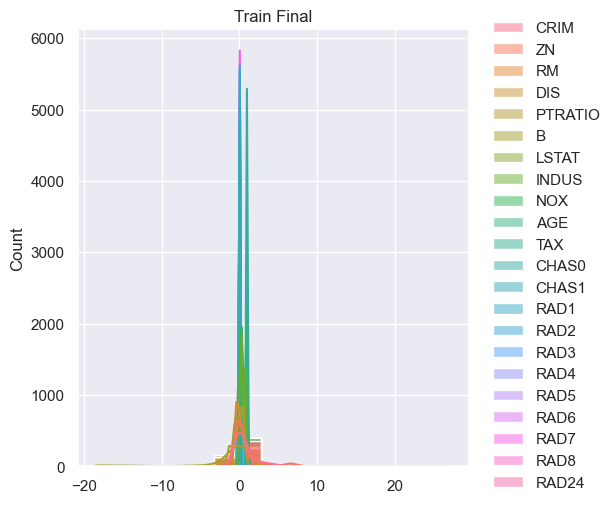

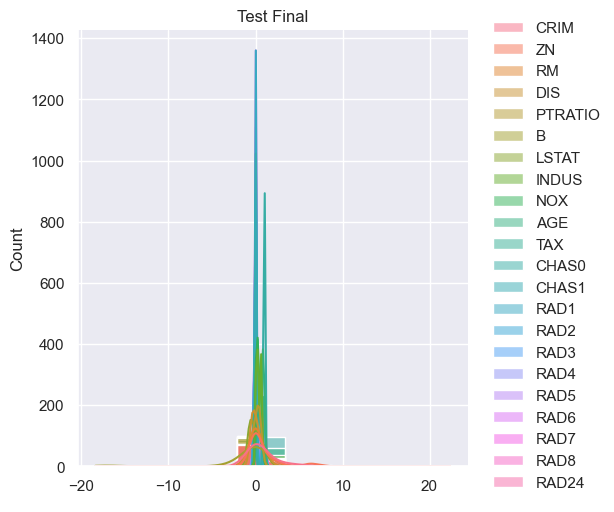

In [56]:
fig = plt.figure(figsize=(50,20))

sns.displot(X_train_final, kde=True, bins=15, ax=ax1)
plt.title('Train Final')

sns.displot(X_test_final, kde=True, bins=15, ax=ax2)
plt.title('Test Final')

plt.show()

Text(0.5, 1.0, 'X_test_final')

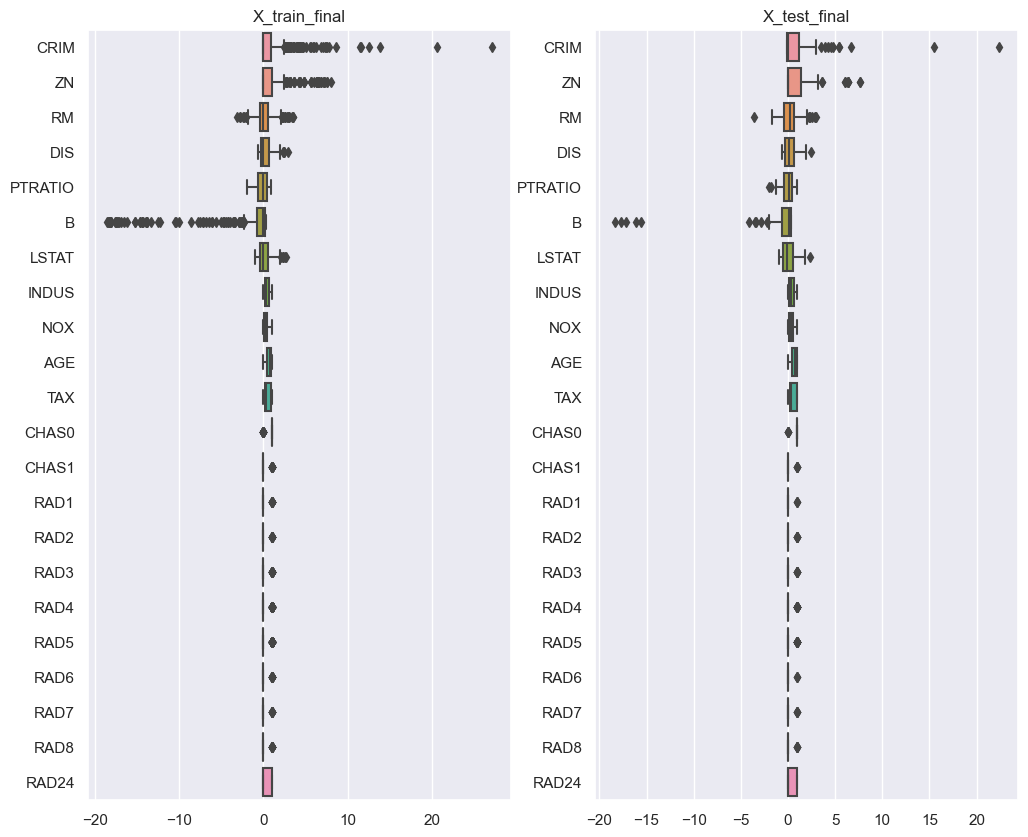

In [57]:
fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(1, 2, 1)
sns.boxplot(X_train_final, ax=ax1, orient = "h")
plt.title('X_train_final')

ax2 = fig.add_subplot(1, 2, 2)
sns.boxplot(X_test_final,ax=ax2, orient = "h")
plt.title('X_test_final')

> Las gráficas nos muestran que las distribuciones de los dataset _X_train_final_ y _X_test_final_ son muy similares y que las medias de todos los valores son coincidentes.